### Temporal plots

Multipanel plot of 7 relevant travel route crimes (polar, calendar, bar) - choose hourly, month, yearly, weekly depending on data


In [3]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import os

# Load the NYPD policing data clean dataset
cwd = os.getcwd()
print(cwd)
parent_dir = os.path.dirname(cwd)
print(parent_dir)
filename = 'NYPD_Complaint_Data_Cleaned.csv'
df = pd.read_csv(filename)
df_cleaned = df.copy()

c:\Users\ollie\OneDrive - Danmarks Tekniske Universitet\Uni\Data analysis and visualisation\Exam Project\johan-bh.github.io
c:\Users\ollie\OneDrive - Danmarks Tekniske Universitet\Uni\Data analysis and visualisation\Exam Project


In [4]:
df.head()

,Complaint_ID,Complaint_From_Date,Complaint_From_Time,Complaint_To_Date,Complaint_To_Time,Precinct,Report_Date,Offense_Code,Offense_Description,Internal_Classification_Code,...,Suspect_Age_Group,Suspect_Race,Suspect_Sex,Latitude,Longitude,Lat_Lon,Patrol_Borough,Victim_Age_Group,Victim_Race,Victim_Sex
0,16784525,06/17/2006,00:30:00,NaN,NaN,6.0,06/18/2006,578,HARRASSMENT 2,638.0,...,45-64,WHITE,F,40.734091,-74.006238,"(40.734091, -74.006238)",PATROL BORO MAN SOUTH,45-64,WHITE,F
1,10973318,04/06/2006,09:30:00,NaN,NaN,6.0,04/12/2006,578,HARRASSMENT 2,638.0,...,18-24,WHITE,F,40.741288,-74.006167,"(40.741288, -74.006167)",PATROL BORO MAN SOUTH,45-64,WHITE,F
2,23859785,08/12/2006,11:29:00,NaN,NaN,20.0,08/12/2006,105,ROBBERY,361.0,...,NaN,WHITE,M,40.775083,-73.982182,"(40.775083, -73.982182)",PATROL BORO MAN NORTH,NaN,NaN,D
3,16544671,05/22/2006,16:30:00,NaN,NaN,47.0,05/22/2006,105,ROBBERY,380.0,...,NaN,BLACK,M,40.903862,-73.846994,"(40.903862, -73.846994)",PATROL BORO BRONX,25-44,WHITE,M
4,27287587,03/07/2007,16:10:00,NaN,NaN,14.0,03/07/2007,105,ROBBERY,361.0,...,NaN,BLACK,M,40.755640,-73.990952,"(40.75564, -73.990952)",PATROL BORO MAN SOUTH,NaN,NaN,D


In [5]:
# Use all offence descriptions as focus crimes
focuscrimes = df['Offense_Description'].unique()
print(focuscrimes)

#focus_crimes = df['Offense_Description'].value_counts().head(12)
#df_focus = df[df['Offense_Description'].isin(focus_crimes.index)]


['HARRASSMENT 2' 'ROBBERY' 'GRAND LARCENY' 'ASSAULT 3 & RELATED OFFENSES'
 'MISCELLANEOUS PENAL LAW' 'PETIT LARCENY' 'RAPE' 'FELONY ASSAULT'
 'FRAUDS' 'FORGERY' 'DANGEROUS DRUGS' 'BURGLARY' 'DANGEROUS WEAPONS'
 'POSSESSION OF STOLEN PROPERTY' 'CRIMINAL MISCHIEF & RELATED OF'
 'OFF. AGNST PUB ORD SENSBLTY &' 'VEHICLE AND TRAFFIC LAWS'
 'INTOXICATED & IMPAIRED DRIVING' 'GRAND LARCENY OF MOTOR VEHICLE'
 'OFFENSES AGAINST PUBLIC ADMINI' 'THEFT-FRAUD'
 'UNAUTHORIZED USE OF A VEHICLE' 'CRIMINAL TRESPASS'
 'OFFENSES INVOLVING FRAUD' 'SEX CRIMES']


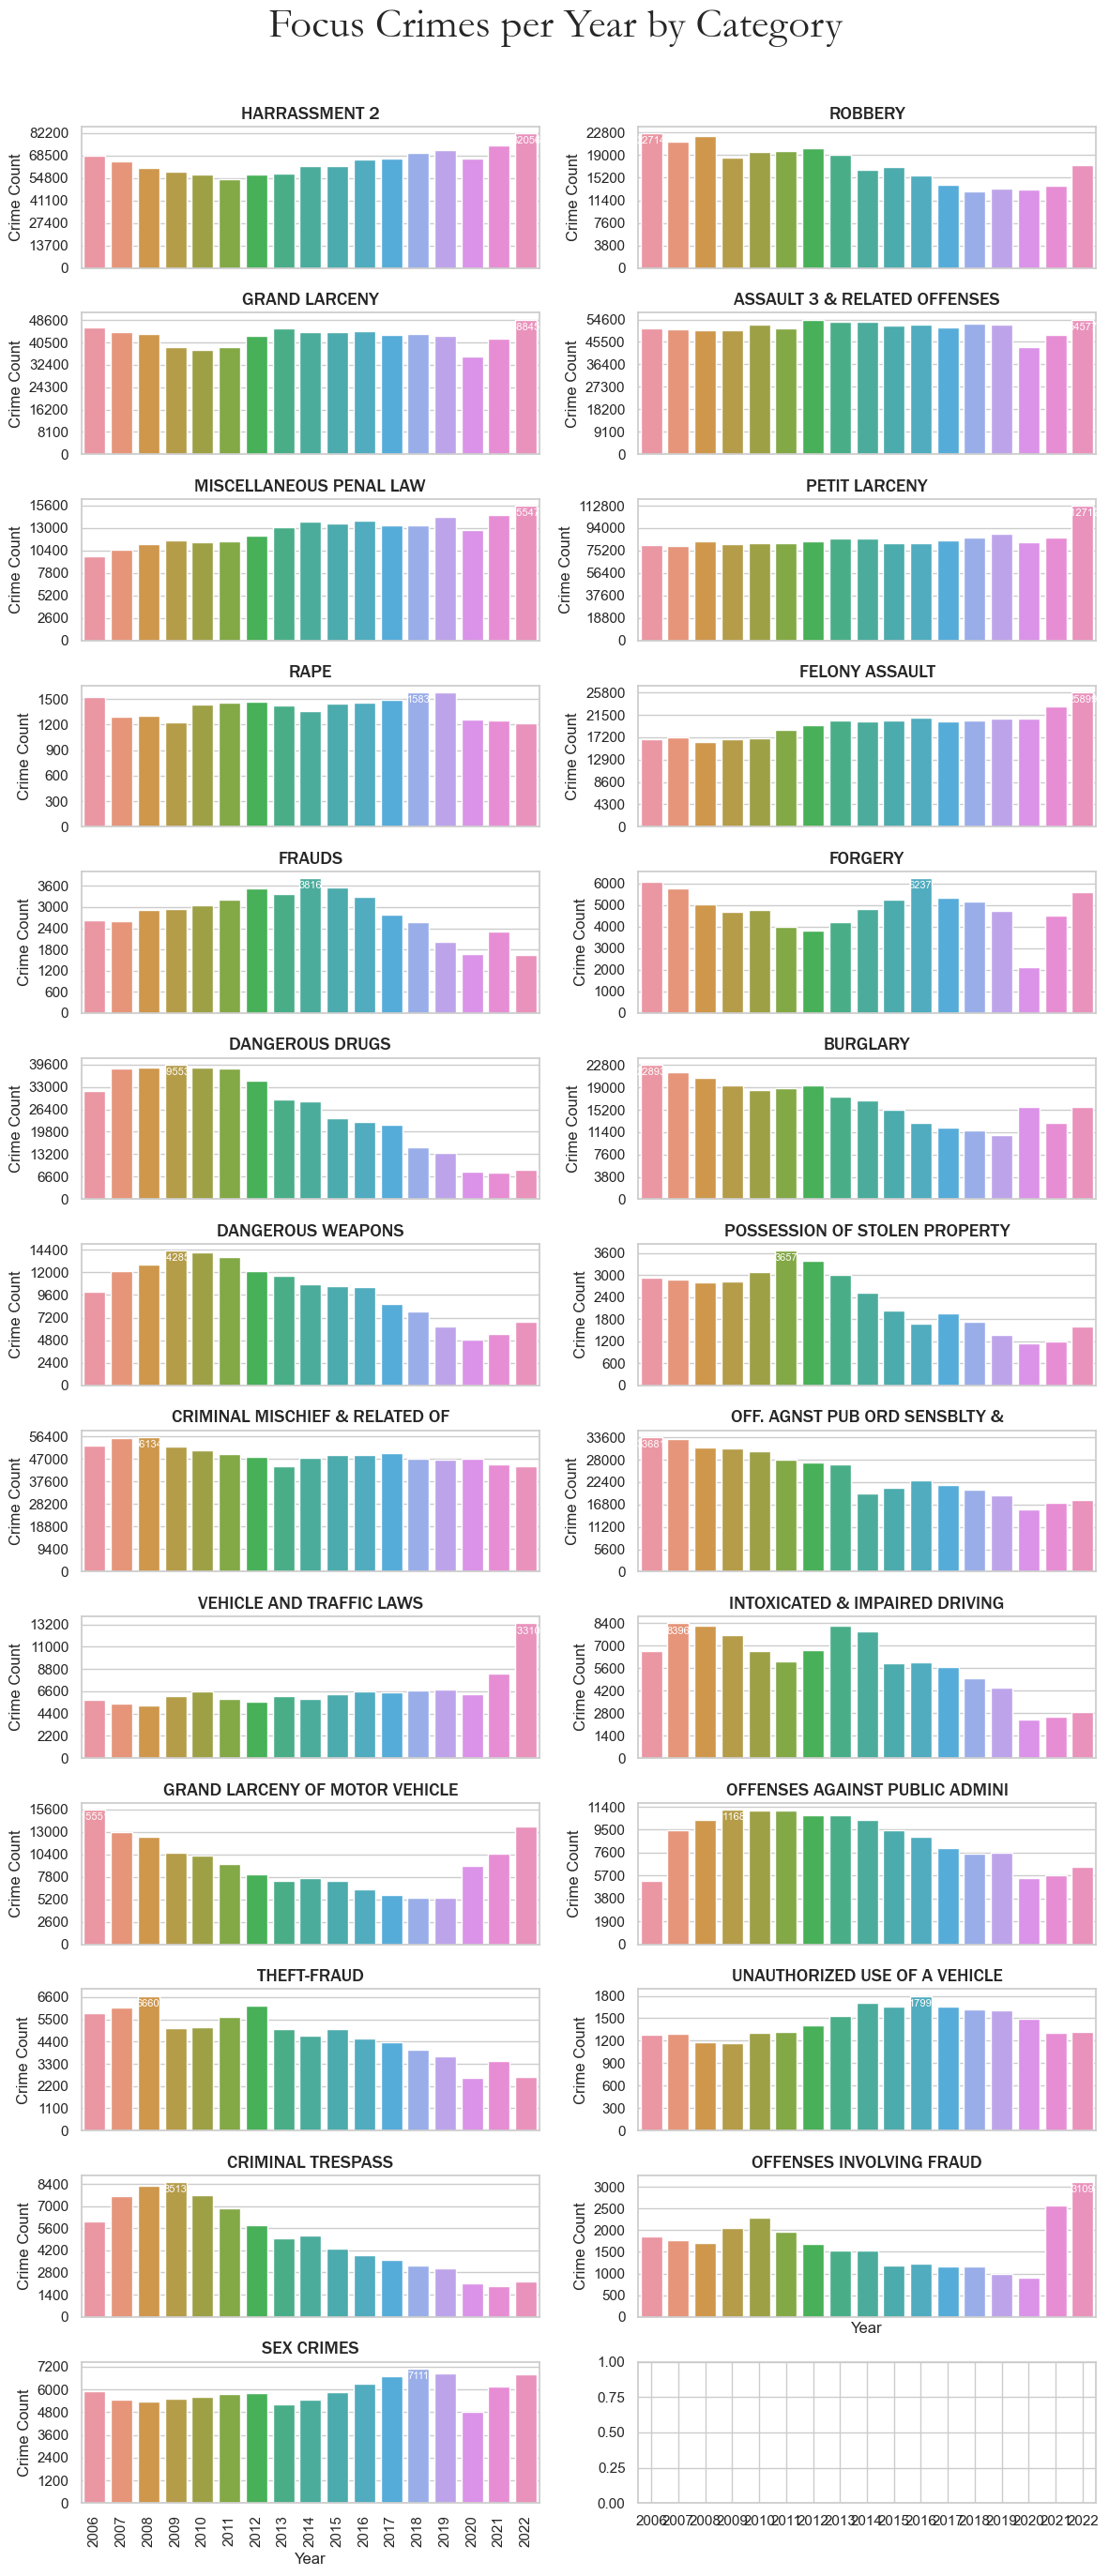

In [6]:
### Yearly Plots ###
sns.set(style="whitegrid")  # Setting the seaborn style
sns.color_palette("hls", 12, desat=1)  # Set color palette, adjust the number if needed for better differentiation

fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(12, 28), sharex=True)
fig.suptitle('Focus Crimes per Year by Category', fontdict={'fontname': 'Garamond', 'weight': 'bold'}, size=32)
fig.subplots_adjust(top=0.95, hspace=0.5)

# Prepare the data by extracting the year from the 'Complaint_From_Date'
df['Year'] = pd.to_datetime(df['Complaint_From_Date']).dt.year
yearly_mapping = {year: i for i, year in enumerate(sorted(df['Year'].unique()))}  # Adjust for the actual years in your data

for i, crime in enumerate(focuscrimes):
    ax = axes[i // 2, i % 2]
    crime_data = df[df['Offense_Description'] == crime]
    y = crime_data['Year'].value_counts().sort_index()
    
    sns.countplot(x='Year', data=crime_data, ax=ax, order=sorted(df['Year'].unique()))

    # annotate the the max count on the plot
    max_count = y.max()
    max_year = y.idxmax()  # get the year with max count
    max_year_index = yearly_mapping[max_year]  # get the index of the year with max count
    ax.text(max_year_index, max_count - max_count/11, f'{max_count}', ha='center', va='bottom', fontsize=8, color='white')

    ax.set_xlabel("Year" if i >= len(focuscrimes) - 2 else "")  # Only label bottom plot of each column
    ax.set_ylabel("Crime Count")
    ax.set_xticklabels(sorted(df['Year'].unique()), rotation=90)  # Set year names as x-tick labels
    ax.set_yticks(np.arange(0, max_count + max_count / 10, round(max_count / 6, -2)))  # Adjust y-ticks
    ax.set_title(crime, fontdict={'fontname': 'Franklin Gothic Medium', 'fontsize': 14})
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the rect to fit the suptitle
plt.show()


In [7]:
yearly_mapping = {year: i for i, year in enumerate(sorted(df['Year'].unique()))} 

print(yearly_mapping)

print("number of columns with 2024: ", len(df[df['Year'] == 2024]))
print("which crimes has year 2024: ", df[df['Year'] == 2024]['Offense_Description'].unique())

{2006: 0, 2007: 1, 2008: 2, 2009: 3, 2010: 4, 2011: 5, 2012: 6, 2013: 7, 2014: 8, 2015: 9, 2016: 10, 2017: 11, 2018: 12, 2019: 13, 2020: 14, 2021: 15, 2022: 16}
number of columns with 2024:  0
which crimes has year 2024:  []


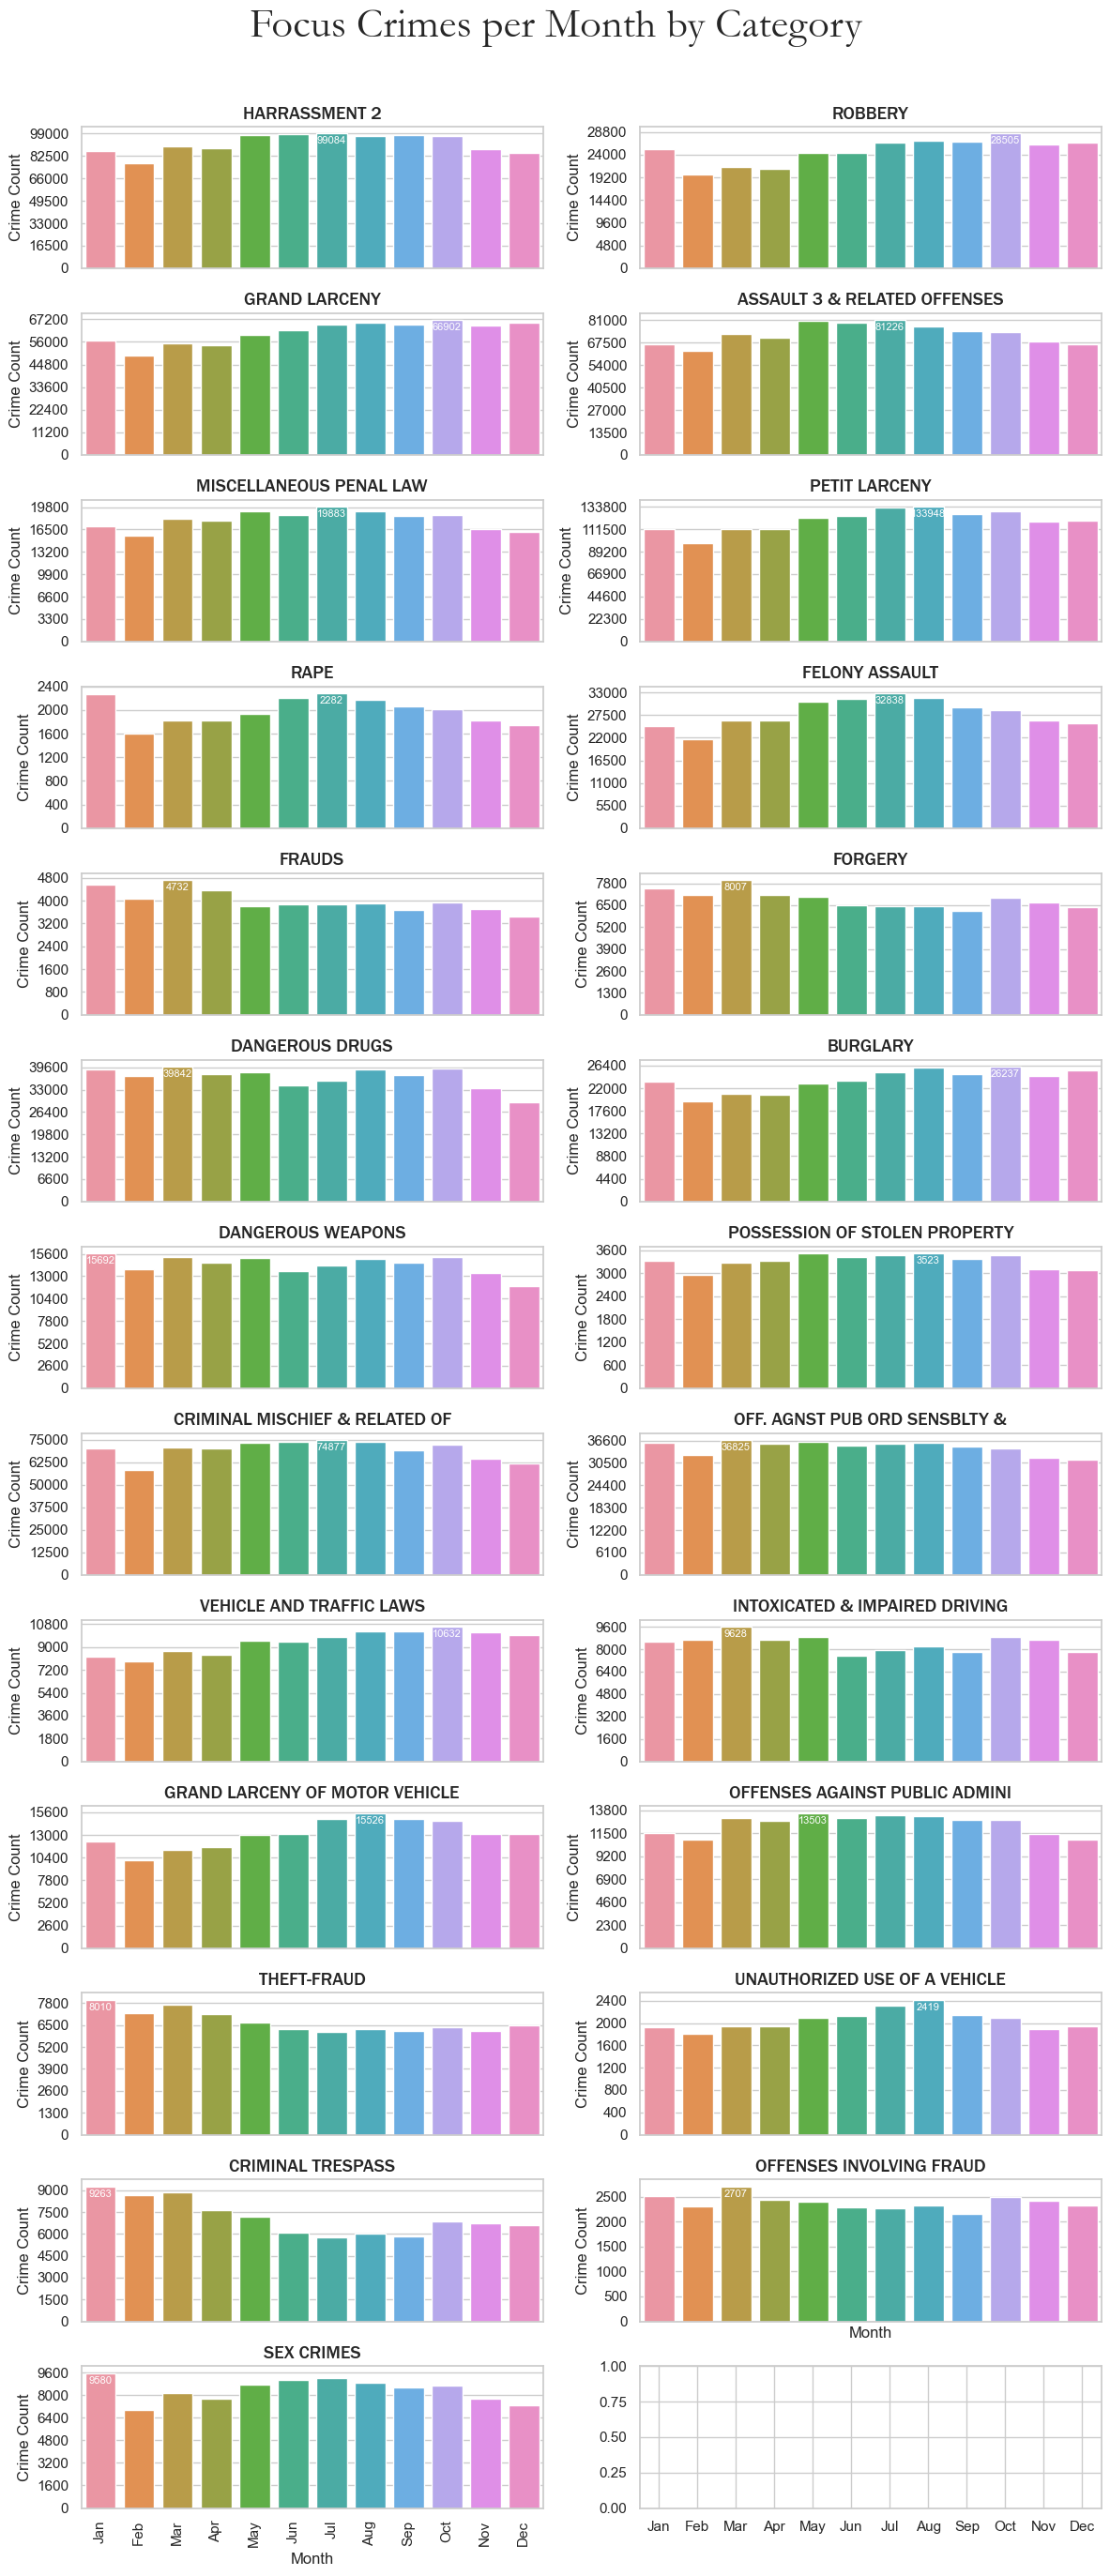

In [8]:
### Months Plots###
# set seasonal color palette using hues for categorical data but also sequential because of inherent time data (hues makes it easier to recognise a month across subplots)
sns.color_palette("hls", 12, desat=1) # reduce saturation (less bright) for consistency with previous plot
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(12, 28), sharex=True)
fig.suptitle('Focus Crimes per Month by Category', fontdict={'fontname': 'Garamond', 'weight': 'bold'}, size=32)
fig.subplots_adjust(top=0.95, hspace=0.5)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#monthly_mapping = {'January': 0, 'February': 1, 'March': 2, 'April': 3, 'May': 4, 'June': 5, 'July': 6, 'August': 7, 'September': 8, 'October': 9, 'November': 10, 'December': 11}
monthly_mapping = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11}

for i, crime in enumerate(focuscrimes):
    ax = axes[i//2, i%2]
    # Convert 'Date' to datetime and extract month
    x = pd.to_datetime(df[df['Offense_Description'] == crime]['Complaint_From_Date'], format='%m/%d/%Y').dt.month
    x = x.astype('category').cat.set_categories(range(1, 13), ordered=True)
    y = x.value_counts().sort_index()
    sns.countplot(x=x, order=range(1, 13), ax=ax)

    # annotate the the max count on the plot
    max_count = y.max()
    max_month = y.idxmax() # get the day with max count
    max_month_index = monthly_mapping[max_month] # get the index of the day with max count
    ax.text(max_month_index, max_count - max_count/11, max_count, ha='center', va='bottom', fontsize=8, color='white') # place annotation just under top of max bar

    ax.set_xlabel("Month" if i >= len(focuscrimes) - 2 else "") # Only label bottom plot of each column
    ax.set_ylabel("Crime Count")
    ax.set_xticklabels(month_names, rotation=90)  # Set month names as x-tick labels
    ax.set_yticks(np.arange(0, y.max()+y.max()/10, round(y.max()/6, -2)))  # Adjust y-ticks
    ax.set_title(crime, fontdict={'fontname': 'Franklin Gothic Medium', 'fontsize': 14})
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the rect to fit the suptitle
plt.show()

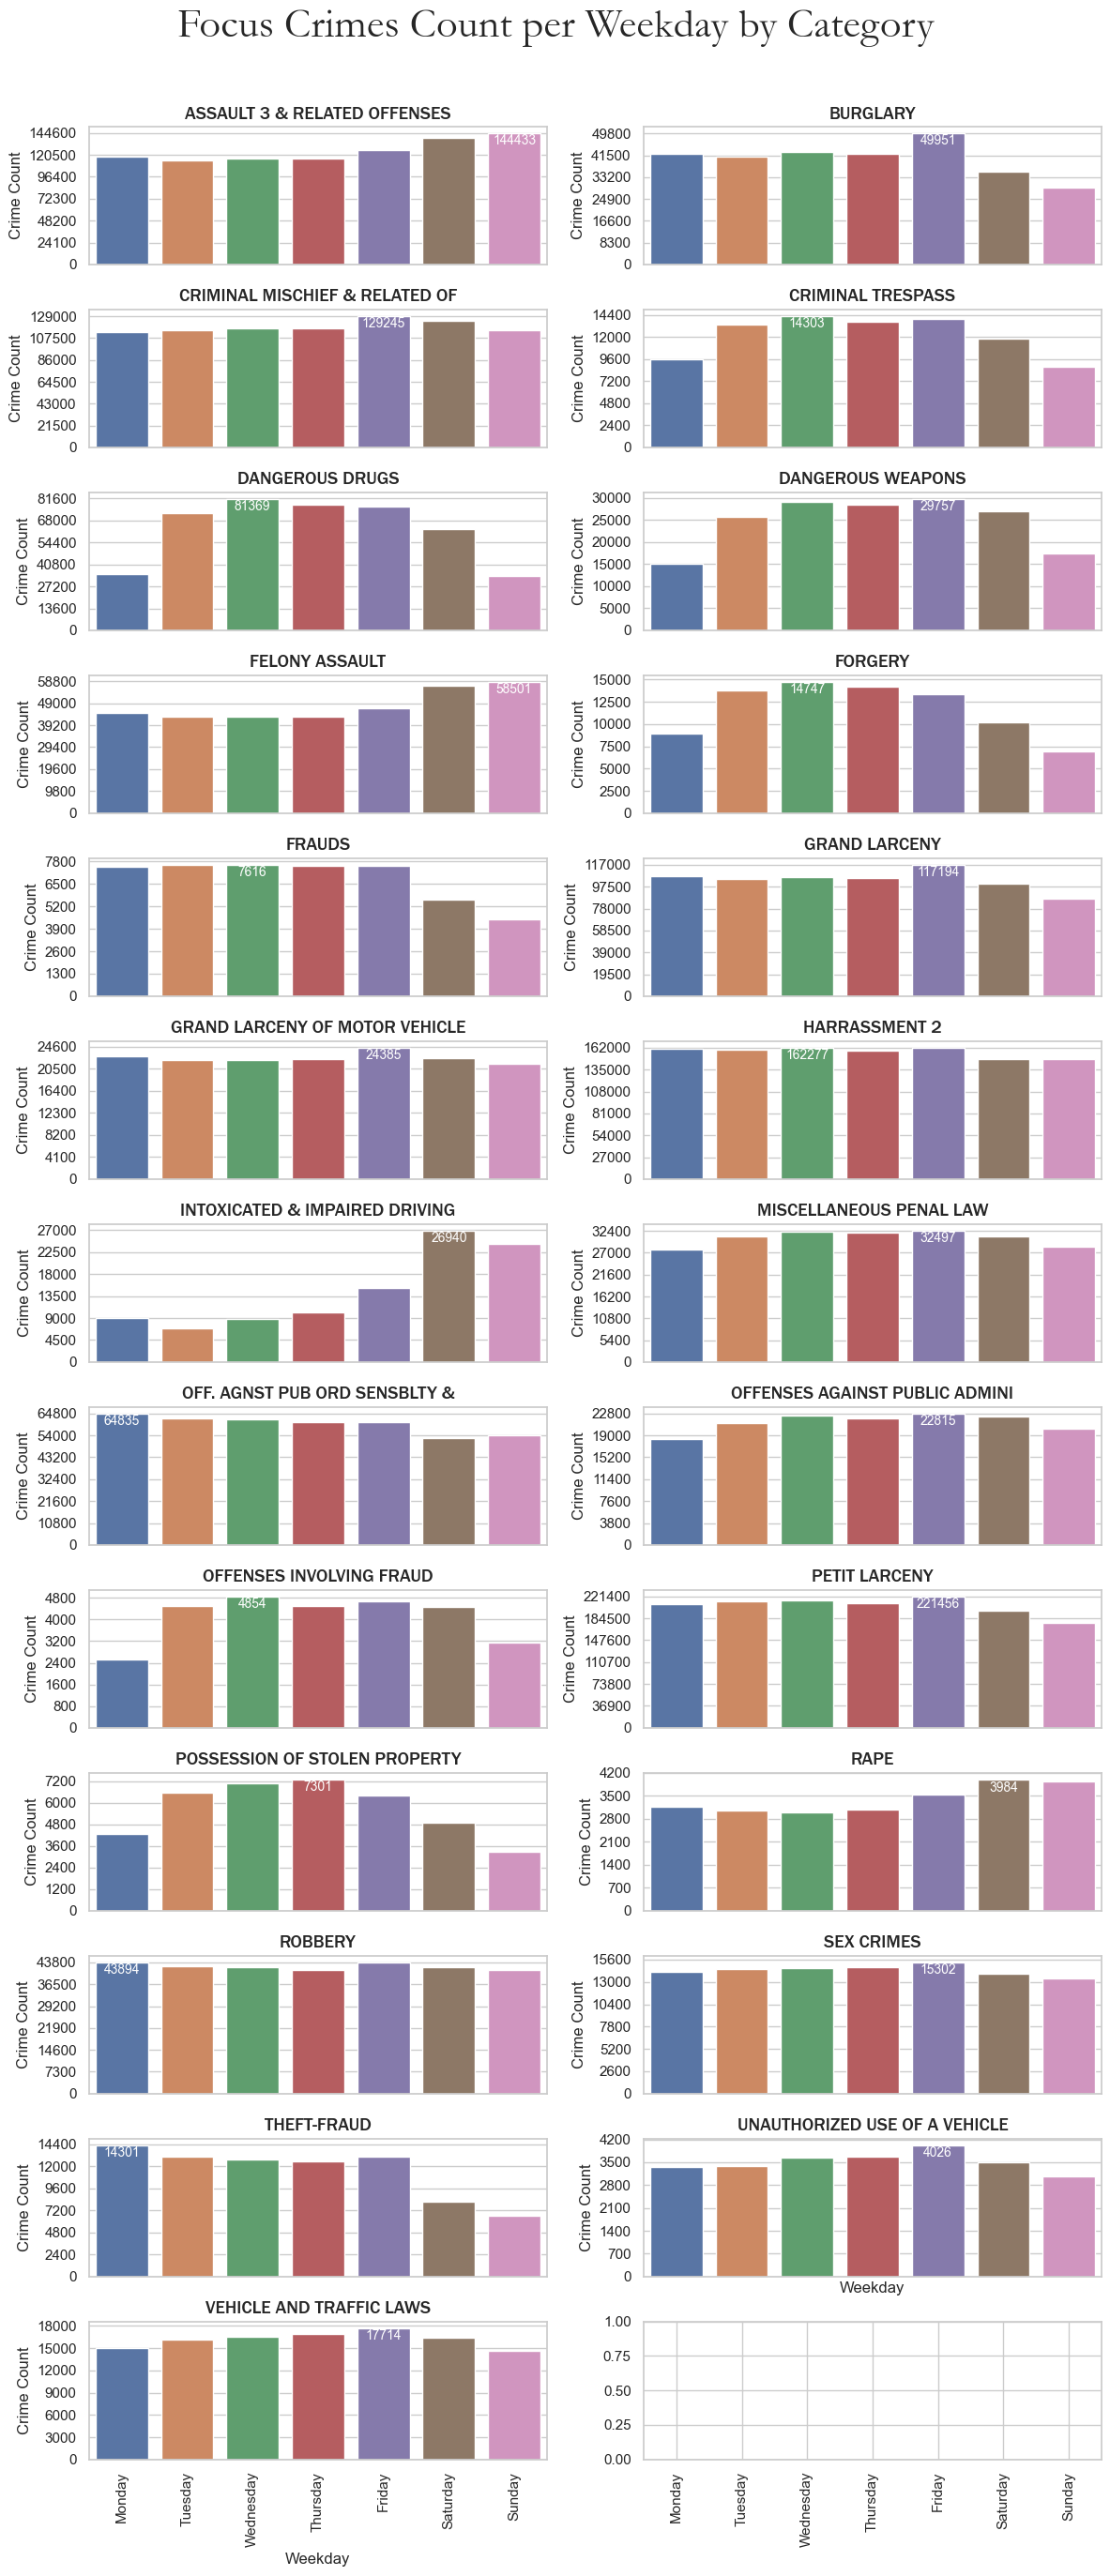

In [9]:
# Choose a subset of focus crimes
#focuscrimes = ['HARRASSMENT 2', 'PETIT LARCENY', 'GRAND LARCENY', 'ASSAULT 3 & RELATED OFFENSES']
#focus_crimes = df['Offense_Description'].value_counts().head(14).index.tolist()
#print(focus_crimes)

### Weekday Plot ###
sns.set_theme(style="whitegrid")
#sns.set_theme(style="darkgrid")
sns.color_palette("hls", 7) # 7 hues for categorical data
# Plot number of crimes per week day in subplots with shared x-axis
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(12, 28), sharex=True)
fig.suptitle('Focus Crimes Count per Weekday by Category', fontdict={'fontname': 'Garamond', 'weight': 'bold'}, size=32) # Large Serif font for capturing title
fig.subplots_adjust(top=0.95, hspace=0.5)  # Adjust the spacing to prevent overlap
focuscrimes = sorted(focuscrimes) # alphabetically sort focuscrimes for consistent order in subplots
weekday_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}


# create DayOfWeek column using 'Complaint_From_Date 
df['Complaint_From_Date'] = pd.to_datetime(df['Complaint_From_Date'])
df['DayOfWeek'] = df['Complaint_From_Date'].dt.day_name()

for i, crime in enumerate(focuscrimes):
    ax = axes[i//2, i%2]
    x = df[df['Offense_Description'] == crime]['DayOfWeek']  
    x = x.astype('category')
    x.cat.set_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
    y = x.value_counts().sort_index()
    sns.countplot(x=x, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=ax) #color='b' if using same colour for all bars
    
    # annotate the the max count on the plot
    max_count = y.max()
    max_day = y.idxmax() # get the day with max count
    max_day_index = weekday_mapping[max_day] # get the index of the day with max count
    ax.text(max_day_index, max_count - max_count/9, max_count, ha='center', va='bottom', fontsize=10, color='white') # place annotation just under top of max bar

    ax.set_xlabel("Weekday" if i >= len(focuscrimes) - 2 else "") # Only label bottom plot of each column
    ax.set_ylabel("Crime Count") 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-ticks
    ax.set_yticks(np.arange(0, y.max()+y.max()/10, round(y.max()/6,-2)))  # Adjust to only 7 y-ticks and must be multiples of 100
    ax.set_title(crime, fontdict={'fontname':'Franklin Gothic Medium', 'fontsize': 14}) # smaller sans-serif font for easy reading of subplots title
plt.xticks(rotation=90)  
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the rect to fit the suptitle
plt.show()

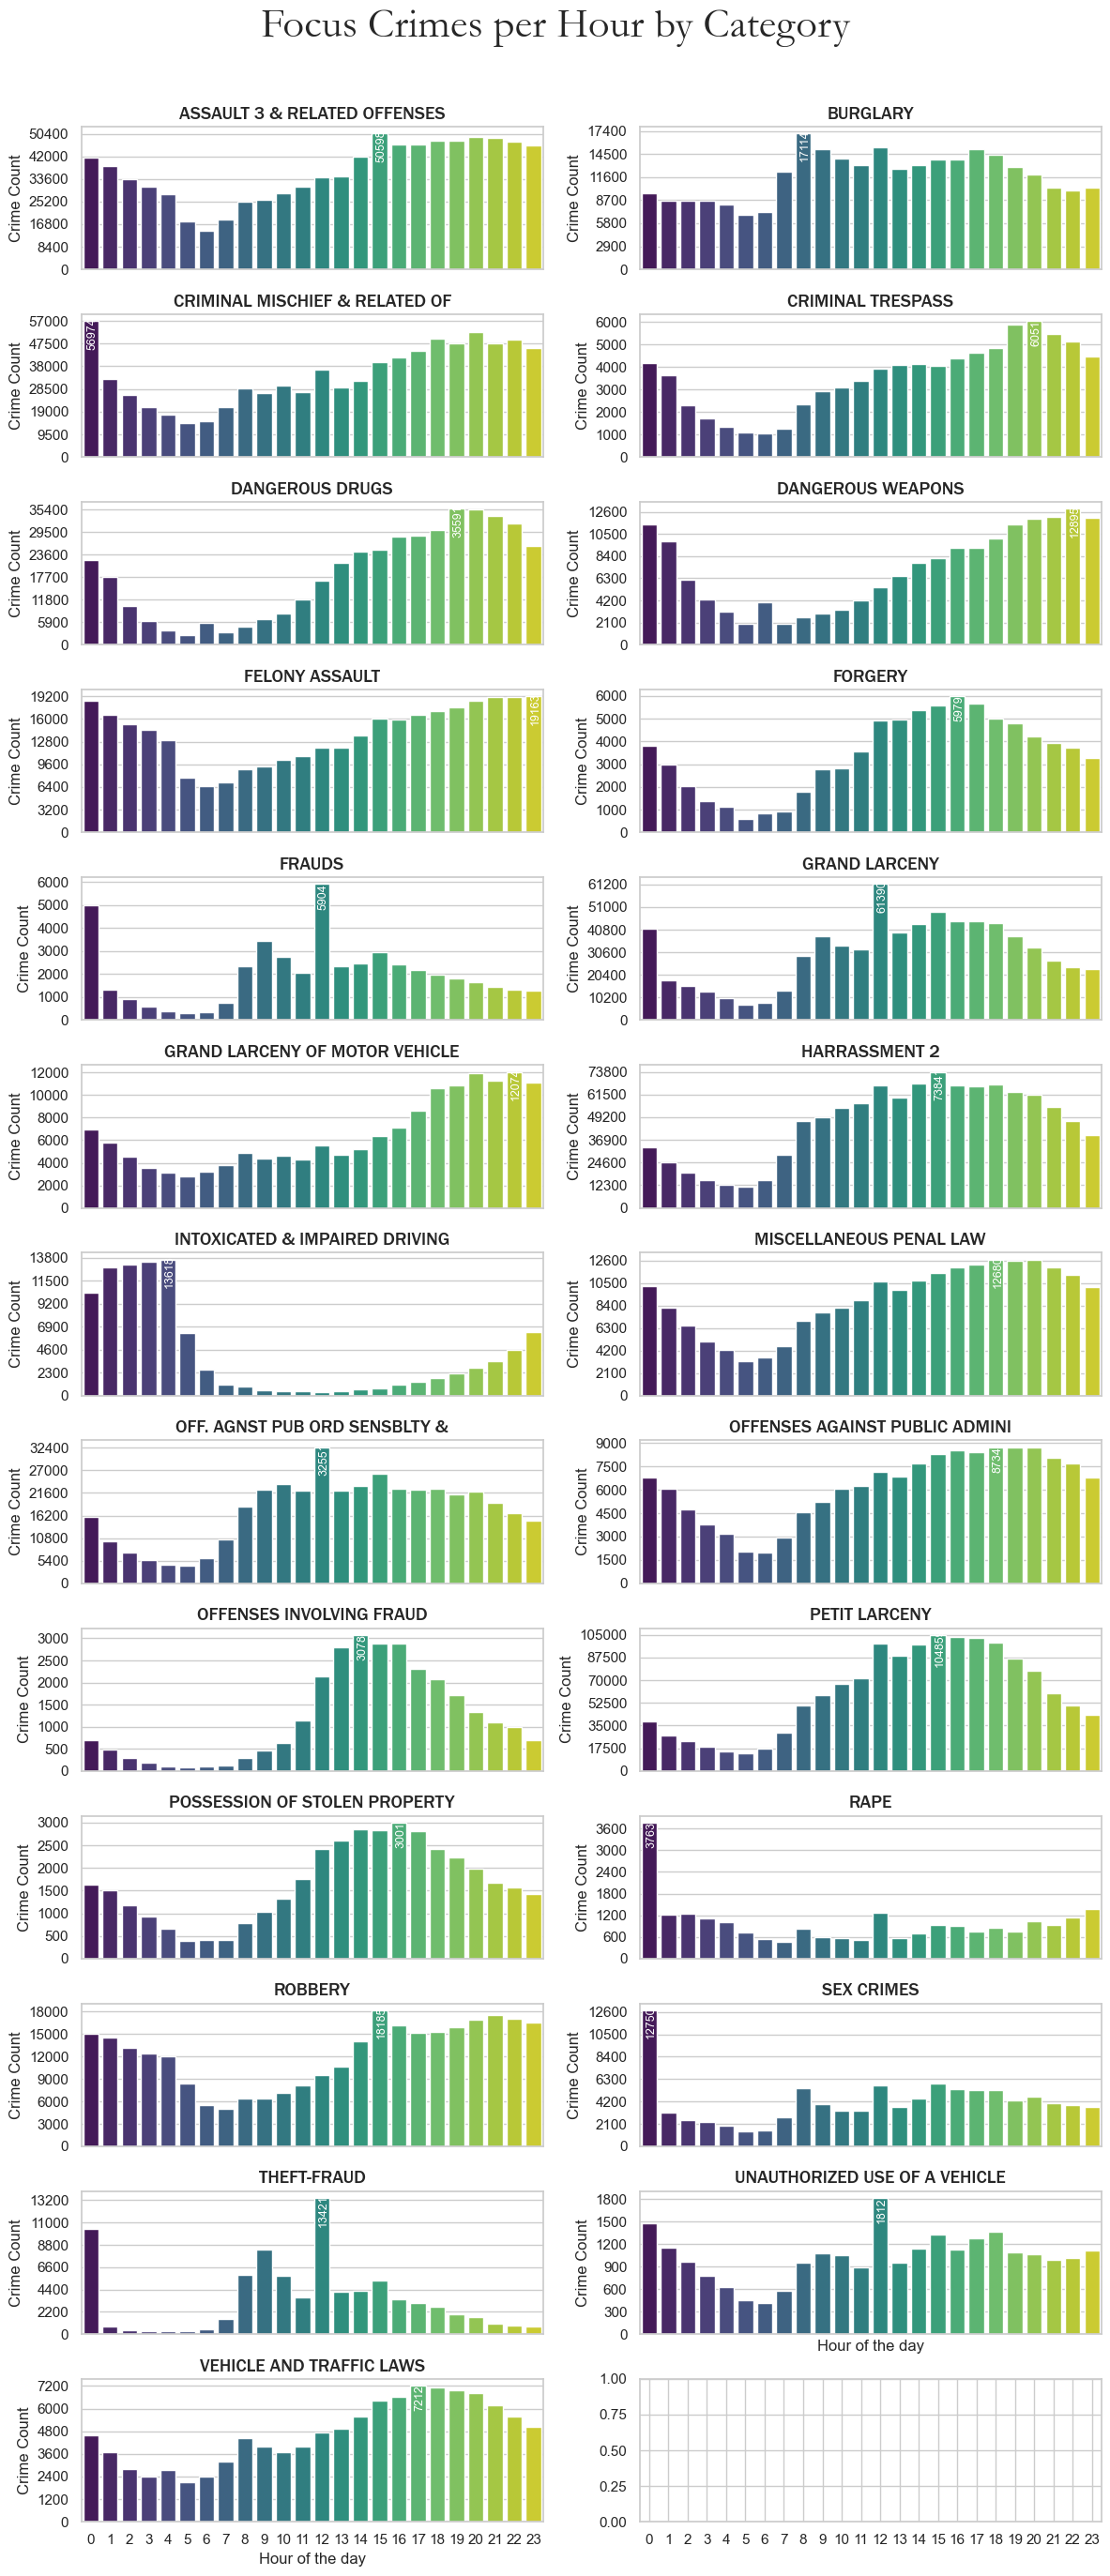

In [12]:
### 24-hour Plot ###
sns.set_palette('viridis') # 24 hours is more sequential than categorical therefore viridis is good
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(12, 28), sharex=True)
fig.suptitle('Focus Crimes per Hour by Category', fontdict={'fontname': 'Garamond', 'weight': 'bold'}, size=32)
fig.subplots_adjust(top=0.95, hspace=0.5)
hour_names = [f'{i}' for i in range(24)]

# harassment_data = df[df['Offense_Description'] == 'HARRASSMENT 2']
# # Extract hour information from the 'Time' column
# #df['DayOfWeek'] = df['Complaint_From_Date'].dt.day_name()
# #harassment_data['Hour'] = df['Complaint_From_Date'].dt.hour
# # Report data is fromatted as such 06/18/2006
# # Complaint_From_Time 16:30:00	
# harassment_data['Hour'] = pd.to_datetime(harassment_data['Complaint_From_Time'], format='%H:%M:%S').dt.hour

for i, crime in enumerate(focuscrimes):
    ax = axes[i//2, i%2]
    # Convert 'Time' to datetime and extract hour
    x = pd.to_datetime(df[df['Offense_Description'] == crime]['Complaint_From_Time'], format='%H:%M:%S').dt.hour
    x = x.astype('category').cat.set_categories(range(24), ordered=True)
    y = x.value_counts().sort_index()
    sns.countplot(x=x, order=range(24), ax=ax, palette='viridis')

    # annotate the the max count on the plot
    max_count = y.max()
    max_hour = y.idxmax() # get the day with max count
    ax.text(max_hour+0.1, max_count - max_count/11, max_count, ha='center', va='center', fontsize=9, color='white', rotation=90) # place annotation just under top of max bar

    ax.set_xlabel("Hour of the day" if i >= len(focuscrimes) - 2 else "")  # Only label bottom plot of each column
    ax.set_ylabel("Crime Count")
    ax.set_xticklabels(hour_names, rotation=0)  # Set hour names as x-tick labels
    ax.set_yticks(np.arange(0, y.max()+y.max()/10, round(y.max()/6, -2)))  # Adjust y-ticks
    ax.set_title(crime, fontdict={'fontname': 'Franklin Gothic Medium', 'fontsize': 14})
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the rect to fit the suptitle
plt.show()


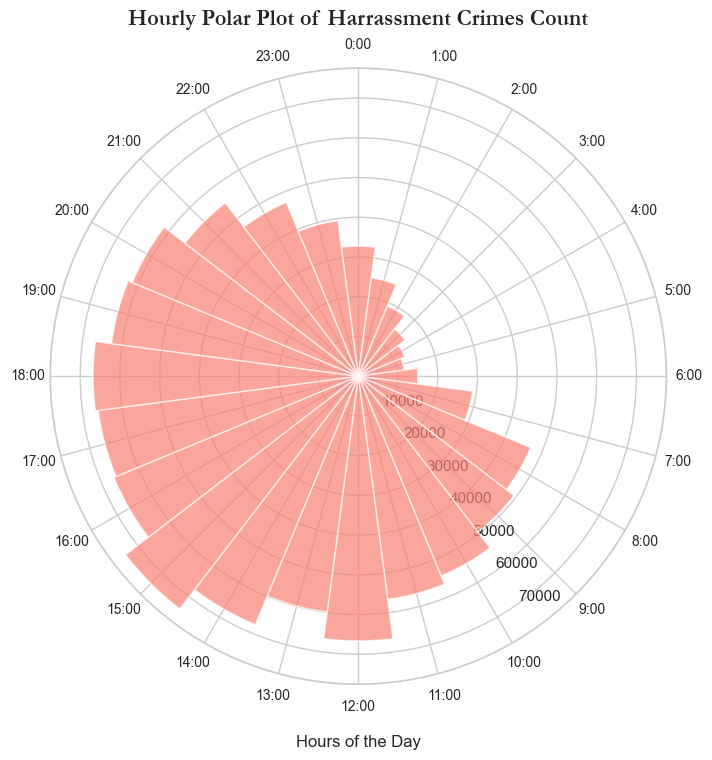

In [48]:
# Hourly polar plot  
import matplotlib.pyplot as plt
import numpy as np

# Filter data for 'HARRASSMENT 2' crimes
harassment_data = df[df['Offense_Description'] == 'HARRASSMENT 2']


# Extract hour information from the 'Time' column
#df['DayOfWeek'] = df['Complaint_From_Date'].dt.day_name()
#harassment_data['Hour'] = df['Complaint_From_Date'].dt.hour
# Report data is fromatted as such 06/18/2006
# Complaint_From_Time 16:30:00	
harassment_data['Hour'] = pd.to_datetime(harassment_data['Complaint_From_Time'], format='%H:%M:%S').dt.hour
#harassment_data['Hour'] = pd.to_datetime(harassment_data['Complaint_From_Date'], format='%H:%M').dt.hour

# Count occurrences for each hour
hour_counts = harassment_data['Hour'].value_counts().sort_index()

# Create a polar plot with each bar representing one hour
theta = np.radians(hour_counts.index * (360 / 24))  # Convert hours to degrees
width = np.radians(15)  # Set the width of each bar to 15 degrees (1 hour)
radii = hour_counts.values

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
bars = ax.bar(theta, radii, width=width, color='salmon', alpha=0.7)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlabel_position(145)

ax.set_title('Hourly Polar Plot of Harrassment Crimes Count', va='bottom', fontdict={'fontname': 'Garamond', 'weight': 'bold'}, size=16)

# Add axis labels with hour names
ax.set_thetagrids(np.degrees(theta), labels=[f'{i}:00' for i in range(24)], fontsize=10)
ax.set_xlabel('Hours of the Day', labelpad=15)

plt.show()

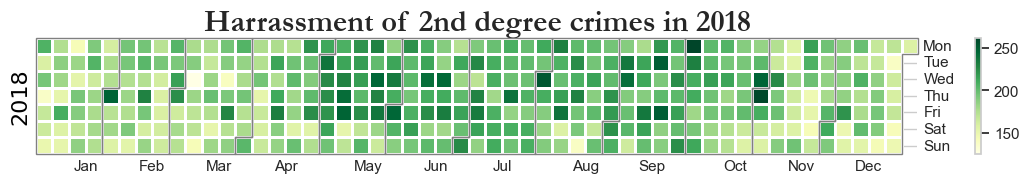

In [49]:
# Calender plot
import calplot
import logging
logging.getLogger('matplotlib.font_manager').disabled = True # Font manager warning are irrelevant and therefore disabled
import warnings
warnings.filterwarnings("ignore") # Ignore warnings

# Filter data for Burglary crimes 2018 because it has the most data which can be seen in week 1 plots.
#df[df['Offense_Description'] == 'HARRASSMENT 2']
harrassment_data = df[(df['Offense_Description'] == 'HARRASSMENT 2') & (df['Complaint_From_Date'].dt.year == (2018))]
# Prepare events for calendar plot
all_days = pd.date_range(start=harrassment_data['Complaint_From_Date'].min(), end=harrassment_data['Complaint_From_Date'].max(), freq='D')
events = pd.Series(1, index=harrassment_data['Complaint_From_Date'])
# Plot
calplot.calplot(events, cmap='YlGn', colorbar=True, monthticks=True, yearlabel_kws={'color': 'black'}) #Yellow green is good for sequential data
plt.title('Harrassment of 2nd degree crimes in 2018', fontdict={'fontname': 'Garamond', 'weight': 'bold'}, size=22)
plt.ylabel('2018', fontsize=16, fontweight='normal')
plt.show()